# visualize the calculation of the discrimination index

## Step 1: Generate Sample Data
Create random scores and binary responses for a hypothetical group of students.


In [1]:
import numpy as np

np.random.seed(42)  # Ensure reproducibility
num_students = 100
scores = np.random.randint(50, 100, size=num_students)  # Random scores between 50 and 100
responses = np.random.choice([0, 1], size=num_students, p=[0.4, 0.6])  # 60% chance of correct response

In [2]:
# import pandas as pd
#
# uscores = list(set(scores))
# cscores = [list(scores).count(i) for i in uscores]
#
# df = pd.DataFrame({'scores': uscores, 'count': cscores})

## Step 2: Identify Upper and Lower Groups
Divide the students into upper and lower groups based on their scores (e.g., top and bottom 27%).

In [3]:
top_percent = 27

sorted_indices = np.argsort(scores)
n_top = int(np.ceil(top_percent / 100 * num_students))

lower_group = sorted_indices[:n_top]
upper_group = sorted_indices[-n_top:]

## Step 3: Calculate the Discrimination Index
Compute the proportion of correct responses for the upper and lower groups and calculate the difference.

In [4]:
from python.discrimination_index import discrimination_index

dinx = discrimination_index(scores, responses, top_percent)

# Print the result
print(f"Discrimination Index: {dinx:.3f}")

Discrimination Index: 0.148


## Step 4: Visualize the Data
Use histograms to show the distribution of scores and distinguish the upper and lower groups visually.

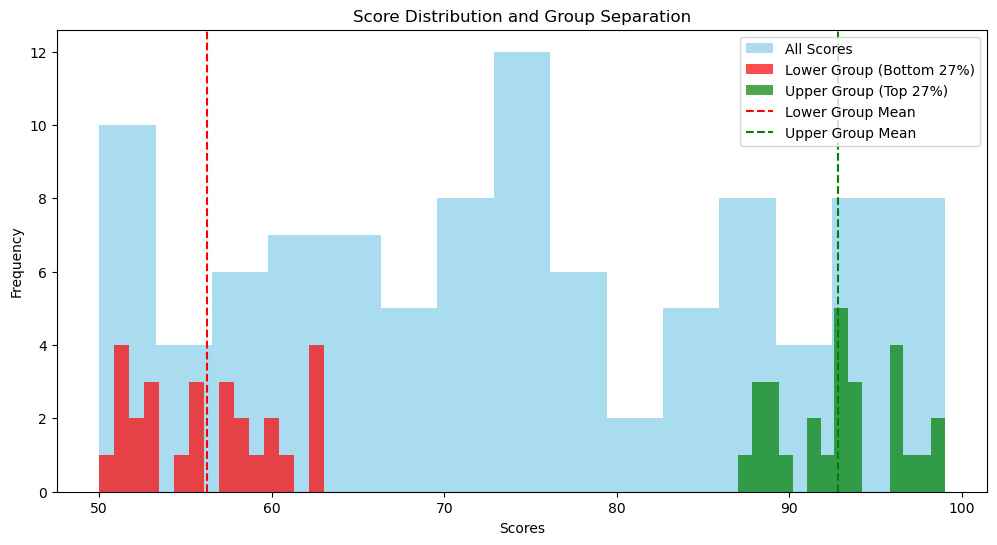

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(scores, bins=15, alpha=0.7, label="All Scores", color="skyblue")
plt.hist(scores[lower_group], bins=15, alpha=0.7, label="Lower Group (Bottom 27%)", color="red")
plt.hist(scores[upper_group], bins=15, alpha=0.7, label="Upper Group (Top 27%)", color="green")
plt.axvline(np.mean(scores[lower_group]), color='red', linestyle='--', label="Lower Group Mean")
plt.axvline(np.mean(scores[upper_group]), color='green', linestyle='--', label="Upper Group Mean")

plt.title("Score Distribution and Group Separation")
plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.legend()

plt.show()